# Урок 2. Профилирование пользователей. Сегментация аудитории: unsupervised learning (clustering, LDA/ARTM), supervised (multi/binary classification)#

План занятия:

1. задача сегментации аудитории
2. тематическое моделирование - получаем эмбединги текстов
3. решаем задачу профилирования аудитории новостного портала

Рассматривать мы все будем в контексте решения конкретной прикладной задачи - задачи оттока

## Задача сегментации

<img src='https://drive.google.com/uc?export=view&id=1fH4dMvgSLT1u9nGc3DCxOI3YGJIkh5dj' width=600>

Разбиваем пользователей на группы, чем-то отличающиеся друг от друга.

Или же:

Сегментация клиентской базы — это способ повышения эффективности работы с пользователями путем их распределения по отдельным группам, или сегментам, в соответствии с их запросами и/или потребностями.

## Виды сегментации

### **1. когда совершил первую покупку (сколько прошло с момента регистрации до момента покупки)**

К примеру, есть сервис по заказу пиццы. Вначале пользователю нужно научиться пользоваться этим ПО, затем нужно сделать первый заказ, а затем пользователь может приходить всё реже и реже, а затем он нас покидает (из-за проблем в сервисе или из-за невкусной пиццы) - это нормальный живой цикл общения.

Это наблюдается в любой системе, где есть работа с клиентами.

Особенно, это известно маркетингу: сначала сотрудники помогают клиенту разобраться в продукте, затем они его поддерживают на пути пользования продуктом, а затем они общаются с ним, дабы клиент не ушел.


<img src='https://drive.google.com/uc?export=view&id=1wf6GFpfQNuxOGJ4xL0n4jb8hvVJjnTGF' width=600>

### **2. по психотипам**

Есть люди, которые делают покупки импульсивно, а есть те, которые всё тщательно обдумывают. И с ними нужно разговаривать по-разному.

<img src='https://drive.google.com/uc?export=view&id=1BRkfhmL1lwxOewbJvw46q8vZnPCAEqAp' width=600>

### **3. по платежам**

Интерес к покупателям, которые приходят к нам раз в год и платят по три копейки и к покупателям, которые приходят каждую неделю и оставляют по 100р, совершенно разный.

 <img src='https://drive.google.com/uc?export=view&id=1-ggaCJCNNV-XyFT2_tHfdjlmYefO85i4' width=800>

### **4. По эффективности взаимодействия (uplift)**

Актуально для телекома. 

Есть несколько групп клиентов:
1. Лояльные - совершают покупку и без нашего взаимодействия и с ним
2. Убеждаемые - совершат покупку только после нашего взаимодействия, без него не сделают покупку
3. Потерянные - не совершат покупку никогда, хоть мы им позвоним, хоть и не будем звонить
4. "не беспокоить" - совершат покупку, если мы их не будем тревожить, если потревожим, то потеряем покупателя.


<img src='https://drive.google.com/uc?export=view&id=1L0TJ8fK3YxuAzc52lz5SE2bgbwLBoS2J' width=500>

### **5. по интересам**

Пример: если человек искал, где купить десткое питание, то можем ему порекомендовать купить и памперсы.

<img src='https://drive.google.com/uc?export=view&id=1Ud1G7YC8eN8qxbCbidNhgd2e-EoEryfl' width=600>

Особенно выгодно профилировать пользователей по социальным сетям. Ведь любое действие и бездействие человека - это данные.
- Подписались на страницу
- Отписались от страницы
- Лайкнули новость
- Проигнорировали новость
- Добавили в избранное
- и т.д.

От этого контента зависят рекламные компании, которые настраиваются на определенную группу пользователей и на вас (а если точнее, не на вас самих, а на образ, который вы создаете в сети).

И еще куча вариантов сегментирования, которое может быть полезно. 

Для чего полезно?

1. понимание аудитории, способность описать основные группы пользователей и их интересы
2. выявление сегментов с максимальной монетизацией
3. выбор маркетинговой стратегии
4. налаживание эффективного взаимодействия с пользователями

## Пример (новостной портал)

Представим, что мы - компания-агрегатор новостей (новостной портал). И мы хотим построить модель прогнозирования оттока клиентов.

У нас есть:

1. читатели
2. новости

Для каждого пользователя мы можем за какой-то период (например, 1 день) достать из базы данных список прочитанных им новостей.

Для каждой новости мы можем вытащить текст и метаинформацию.


<img src='https://drive.google.com/uc?export=view&id=1OLrm1Rx9VjRVHbBW25Gi_mfUjY-WhB3p' width=700>

Нужно построить модель прогнозирования оттока. 


Нам нужны:

1. векторное представление пользователя
2. сегменты, описывающие интересы пользователя

p.s. в контексте нашей задачи - это одно и то же

Есть два очевидных варианта как это сделать:

1. многоклассовая классификация
    - **Проблема:**
    для классификации нам нужно сначала разметить новости - привлечение ручного труда
2. кластеризация документов с последующей попыткой их (кластера) интерпретировать

### Задача тематического моделирования (LDA)

LDA - Latent Dirichlet allocation

Терминология:

1. документ - коллекция слов 
2. тема - набор токенов (слов), совместно часто встречающихся в документах

- на свете бывают темы (заранее неизвестные), которые отражают то, о чём могут быть части документа;
- каждая тема – это распределение вероятностей на словах, т.е. мешок слов, из которого можно с разной вероятностью вытащить разные слова;

<img src='https://drive.google.com/uc?export=view&id=10hJ_zkUHDK1-hAYcdxUix5r9Wyaik9TA' width=500>


- каждый документ – это смесь тем, т.е. распределение вероятностей на темах, кубик, который можно кинуть *(тема искусства включает в себя не только слова балет и танцы, но и финансы, и кредиты)*; каждая тема в документе будет представлена в разных пропорциях (*если написал руководитель театра, то будет больше про танцы, а если написал министр культуры, то скорее про финансы, но везде говорим про искусство*)

<img src='https://drive.google.com/uc?export=view&id=1o7Bvl_2sscs3ldpxo4faqXCDIqTbkO8H' width=500>

- процесс порождения каждого слова состоит в том, чтобы сначала выбрать тему по распределению, соответствующему документу, а затем выбрать слово из распределения, соответствующего этой теме.

Предположим, что у нас есть несколько предложений:

1. I like to eat broccoli and bananas.
2. I ate a banana and spinach smoothie for breakfast.
3. Chinchillas and kittens are cute.
4. My sister adopted a kitten yesterday.
5. Look at this cute hamster munching on a piece of broccoli.

LDA - это метод для автоматического поиска тем, которые есть в предложениях. К примеру, если мы передадим эти предложения в модель и попросим найти 2 темы, то может получить что-то подобное:

- Предложения 1 и 2: 100% Topic A
- Предложения 3 и 4: 100% Topic B
- Предложение 5: 60% Topic A, 40% Topic B

<br>

- Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, … (уже сейчас можем понять, что topic A о еде)
- Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, … (topic B о милых животных)

Ну и конечно же вопрос, как LDA это делает?

Вероятностные модели удобно понимать и представлять в виде порождающих процессов (generative processes), когда мы последовательно описываем, как порождается одна единица данных, вводя по ходу дела все вероятностные предположения, которые мы в этой модели делаем. Соответственно, порождающий процесс для LDA должен последовательно описывать, как мы порождаем каждое слово каждого документа. И вот как это происходит:


0. Выбрать количество тем N
1. Случайно присвоить каждое слово в каждом документе к одной из N тем
    * *Заметьте, что это рандомное присвоение уже даёт распределение тем в документах и распределение слов во всех темах (но конечно не самого лучшего качества)*

2. Для каждого слова $w$ в документе $d$:
 * И для каждой темы $t$, посчитать две вероятности:
    * *предположить, что все присвоенные темы документы правильные за исключением одной, с которой работаем*
    1. $p(t|d)$ - Вероятность слов в документе, которые присвоены к теме
    2. $p(w|t)$ - Вероятность принадлежности слов из всех документов к теме $t$
 * Переопределить тему слова $w$, с помощью вероятности $p(t|d)*p(w|t)$ (опираясь на нашу модель, это вероятность того, что тема $t$ генерирует слово $w$)

3. В конечном счете достигнется стабильное состояние, когда присвоения имеют смысл.

Бросаем кубик, у которого столько сторон, сколько слов в словаре. Но определенные стороны кубика утяжеленные, то есть он будет чаще на них падать.

Например, если тема спорт, то слова "футбол", "вратарь", "мяч" будут попадаться гораздо чаще внутри этой темы.

<img src='https://drive.google.com/uc?export=view&id=1h4qc01naiyUZA0Q63bcv64ZnC2AKwbgp' width=600>

Таким образом, любой текст порождается из распределений, путем подбрасывания кубиков.

  ист. https://habr.com/ru/company/surfingbird/blog/230103/

1. условное распределение на множестве терминов, p(w|t). вероятность того, что слово w принадлежит теме t.
2. тематический профиль документа - условное распределение тем p(t|d). вероятность того, что тема t принадлежит документу d.
3. условное распределение слов в документах - p(w|d). вероятность, что слово w есть в документе d.


Тематическая модель позволяет нам получить p(w|t), p(t|d) по известным p(w|d)

<img src='https://drive.google.com/uc?export=view&id=1pd-ieIcQCF11xOwXbRt2v5Q1LRE2d1yV' width=600>

Когда начинаем решать задачу, то нам известно p(w|d). И нам не известно с какой вероятностью встречаются слова в темах и какие темы находятся в нашем документе и с какой вероятностью.
Есть проблема, что мы не знаем, какое количество тем есть в нашей задаче - это гиперпараметр.

### Переходим к практике


Вспомним, какие задачи перед нами стоят:
Основная - представление характеристик пользователя по списку статей, которые он читал.
1. Взять статьи и превратить их в темы.
2. Взять темы и превратить их в вектор, описывающий пользователя.


In [1]:
import pandas as pd

Наши новости

In [2]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zrdSHN2tq_Hj3YdbwlM3jk87Oct42XpR" -O articles.csv && rm -rf /tmp/cookies.txt 

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
news = pd.read_csv("data/articles.csv")
print(news.shape)
news.head(3)

(27000, 2)


,doc_id,title
0,6,Заместитель председателяnправительства РФnСерг...
1,4896,Матч 1/16 финала Кубка России по футболу был п...
2,4897,Форвард «Авангарда» Томаш Заборский прокоммент...


In [4]:
news.iloc[0]['title']

'Заместитель председателяnправительства РФnСергейnИвановnизбран председателем советаnПБК ЦСКАn. Как сообщаетnпресс-службаnармейцев, такое решение было единогласно принято на первом заседании совета клуба. Основной функцией этого органа будет обсуждение текущего состояния, планирование и утверждение стратегии развития клуба на ближайшую перспективу.nnВ состав совета вошли:nГеоргий Полтавченкоn(полномочный представитель президента в Центральном федеральном округе),nАлексей Седовn(генерал-полковник, начальник службы по защите конституционного строя и борьбе с терроризмомnФСБ РФn),nАлександр Новакn(заместитель министра финансов РФ),nВячеслав Полтавцевn(заместитель генерального директора, руководитель блока по взаимодействию с органами власти, социальной и корпоративной политикиnГМК «Норильский никель»n),nЛеонид Исаковичn(генеральный директор ООО «УК «Спортивные проекты»),nОльга Плешаковаn(генеральный директорn«Трансаэро»n),nАлександр Провоторовn, (генеральный директорnОАО «Ростелеком»n), А

In [5]:
!wget 'https://drive.google.com/uc?export=download&id=1Q97K9eGrvpbS4ut5CphZa--gJDRqQp2a' -O users_articles.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Загрузим пользователей и списки последних прочитанных новостей

In [6]:
users = pd.read_csv("data/users_articles.csv")
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


Итак, нам нужно получить векторные представления пользователей на основе прочитанным ими новостей и самих новостей

### 1. Получаем векторные представления новостей

**ПОЗАВТРАКАЛИ**

Стемминг (убираем лишнии куски слова):
**завтрак**<br>
Очень быстро, очень дешево и очень слабо.

Лемматизация (перевод в неопределенную форму для гл. и в им.падеж для сущ.):
**завтракать**<br>
Небыстро, сложно.


In [7]:
# предобработка текстов
import re
import numpy as np
from gensim.corpora.dictionary import Dictionary
from razdel import tokenize  # сегментация русскоязычного текста на токены и предложения https://github.com/natasha/razdel
import pymorphy2  # Морфологический анализатор

Не все слова равны, не все слова одинаково работают. К примеру, союзы и предлоги в нашей задачи никак не помогут, поэтому можем их выкидывать. (*Но в задачах оценки стиля, к примеру, такие слова будут очень полезны*)

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopword_ru = stopwords.words('russian')
print(len(stopword_ru))

151


In [10]:
stopword_ru[:10]

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [11]:
!wget 'https://drive.google.com/uc?export=download&id=17wVn5YPpMjHToctGgff_KfSeWcIIlf7c' -O stopwords.txt

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [12]:
with open('data/stopwords.txt') as f:
    additional_stopwords = [w.strip() for w in f.readlines() if w]
    
stopword_ru += additional_stopwords
len(stopword_ru)

776

In [13]:
stopword_ru[200:210]

['РЅРё',
 'Р±С‹С‚СЊ',
 'Р±С‹Р»',
 'РЅРµРіРѕ',
 'РґРѕ',
 'РІР°СЃ',
 'РЅРёР±СѓРґСЊ',
 'РѕРїСЏС‚СЊ',
 'СѓР¶',
 'РІР°Рј']

In [14]:
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищеный текст
    '''
    if not isinstance(text, str):
        text = str(text)
    
    text = text.lower()
    text = text.strip('\n').strip('\r').strip('\t')
    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
    text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
    text = re.sub('n', ' ', text)
    
    return text

cache = {}
morph = pymorphy2.MorphAnalyzer()

def lemmatization(text):    
    '''
    лемматизация
        [0] если зашел тип не `str` делаем его `str`
        [1] токенизация предложения через razdel
        [2] проверка есть ли в начале слова '-'
        [3] проверка токена с одного символа
        [4] проверка есть ли данное слово в кэше
        [5] лемматизация слова
        [6] проверка на стоп-слова

    на выходе лист лемматизированых токенов
    '''

    # [0]
    if not isinstance(text, str):
        text = str(text)
    
    # [1]
    tokens = list(tokenize(text))
    words = [_.text for _ in tokens]

    words_lem = []
    for w in words:
        if w[0] == '-': # [2]
            w = w[1:]
        if len(w) > 1: # [3]
            if w in cache: # [4]
                words_lem.append(cache[w])
            else: # [5]
                temp_cach = cache[w] = morph.parse(w)[0].normal_form
                words_lem.append(temp_cach)
    
    words_lem_without_stopwords = [i for i in words_lem if not i in stopword_ru] # [6]
    
    return words_lem_without_stopwords

In [15]:
morph = pymorphy2.MorphAnalyzer()
morph.parse('позавтракали')[0].normal_form

'позавтракать'

In [16]:
news['title'].iloc[:2].apply(lambda x: clean_text(x))

C:\Users\nikit\AppData\Local\Temp\ipykernel_10064\3775971389.py:14: FutureWarning: Possible nested set at position 39
  text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)


0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
Name: title, dtype: object

In [17]:
%%time
from tqdm import tqdm
tqdm.pandas()

# Запускаем очистку текста. Будет долго...
news['title'] = news['title'].progress_apply(lambda x: clean_text(x))

100%|██████████| 27000/27000 [00:35<00:00, 760.41it/s] 


CPU times: total: 32.8 s
Wall time: 35.5 s


In [18]:
news['title'].iloc[:10]

0    заместитель председателя правительства рф серг...
1    матч  финала кубка россии по футболу был приос...
2    форвард авангарда томаш заборский прокомментир...
3    главный тренер кубани юрий красножан прокоммен...
4    решением попечительского совета владивостокско...
5    ио главного тренера вячеслав буцаев прокоммент...
6    запорожский металлург дома потерпел разгромное...
7    сборная сша одержала победу над австрией со сч...
8    бывший защитник сборной россии дарюс каспарайт...
9    полузащитник цска зоран тошич после победы над...
Name: title, dtype: object

In [19]:
news['title'].iloc[:2].apply(lambda x: lemmatization(x))

0    [заместитель, председатель, правительство, рф,...
1    [матч, финал, кубок, россия, футбол, приостано...
Name: title, dtype: object

In [20]:
%%time
# Запускаем лемматизацию текста. Будет очень долго...
news['title'] = news['title'].progress_apply(lambda x: lemmatization(x))

100%|██████████| 27000/27000 [04:05<00:00, 110.05it/s]


CPU times: total: 3min 57s
Wall time: 4min 5s


А теперь в 3 строчки обучим нашу модель

In [21]:
# сформируем список наших текстов
texts = list(news['title'].values)

# Создадим корпус из списка с текстами
common_dictionary = Dictionary(texts)
common_corpus = [common_dictionary.doc2bow(text) for text in texts]

Что такое common_dictionary и как он выглядит

In [22]:
len(common_dictionary)

135723

In [23]:
common_dictionary[4]

'банк'

In [24]:
# common_dictionary.id2token

In [25]:
common_dictionary.doc2bow(['коллега', 'пошел', 'пить', 'чай'], allow_update=True)

[(1036, 1), (6204, 1), (12347, 1), (135723, 1)]

Все просто - это словарь наших слов

Запускаем обучение

In [26]:
N_topic = 20

In [27]:
%%time
from gensim.models import LdaModel

# Обучаем модель на корпусе
lda = LdaModel(common_corpus, num_topics=N_topic, id2word=common_dictionary)#, passes=10)

CPU times: total: 47.8 s
Wall time: 46.4 s


In [28]:
from gensim.test.utils import datapath

# Сохраняем модель на диск
temp_file = datapath("model.lda")
lda.save(temp_file)

In [29]:
# Загружаем обученную модель с диска
lda = LdaModel.load(temp_file)

In [30]:
# Создаем новый корпус документов, которые раньше не видели
other_texts = list(news['title'].iloc[:3])
other_corpus = [common_dictionary.doc2bow(text) for text in other_texts]

unseen_doc = other_corpus[2]
print(other_texts[2])
lda[unseen_doc] 

['форвард', 'авангард', 'томаш', 'заборский', 'прокомментировать', 'игра', 'свой', 'команда', 'матч', 'чемпионат', 'кхл', 'против', 'атланта', 'провести', 'плохой', 'матч', 'нижний', 'новгород', 'против', 'торпедо', 'настраиваться', 'первый', 'минута', 'включиться', 'работа', 'сказать', 'заборский', 'получиться', 'забросить', 'быстрый', 'гол', 'задать', 'хороший', 'темп', 'поединок', 'мочь', 'играть', 'ещё', 'хороший', 'сторона', 'пять', 'очко', 'выезд', 'девять', 'это', 'хороший']


[(0, 0.23772168), (5, 0.06568339), (13, 0.020306602), (17, 0.6579161)]

Обучили модель. Теперь 2 вопроса:

1. как выглядят наши темы
2. как получить для документа вектор значений (вероятности принадлежности каждой теме)

In [31]:
x = lda.show_topics(num_topics=N_topic, num_words=7, formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

# Печатаем только слова
for topic, words in topics_words:
    print(f"topic_{topic}: " + " ".join(words))

topic_0: планета организм атмосферный сон испания тур мир
topic_1: украина путин операция температура это который двигатель
topic_2: высота лаборатория солнце статья погода пресссекретарить доказательство
topic_3: суд дело рак пенсия уголовный следствие год
topic_4: северный южный корея ким ми су проба
topic_5: год исследование который фонд мозг это человек
topic_6: год это который мочь россия российский страна
topic_7: год журнал смерть который автор обнаружить стать
topic_8: который год это россия территория правительство также
topic_9: военный россия год российский рубль агентство земля
topic_10: гражданин это университет год научный украина анализ
topic_11: космос устойчивый ресторан студент фаза пищевой опасаться
topic_12: год компания млн составить банк ставка стоимость
topic_13: белый грант фирма край выстрел новгород дальневосточный
topic_14: ракета станция граница виза задержать аэропорт таможенный
topic_15: газ форум почва антонов метан венгрия топливо
topic_16: тело район пр

Очень неплохо - большинство тем вполне можно описать о чем они

Давайте напишем функцию, которая будет нам возвращать векторное представление новости

In [32]:
def get_lda_vector(lda, text):
    unseen_doc = common_dictionary.doc2bow(text)
    lda_tuple = lda[unseen_doc]

    not_null_topics = dict(zip([i[0] for i in lda_tuple], [i[1] for i in lda_tuple]))

    output_vector = []
    for i in range(N_topic):
        if i not in not_null_topics:
            output_vector.append(0)
        else:
            output_vector.append(not_null_topics[i])
    return np.array(output_vector)

In [33]:
get_lda_vector(lda, news['title'].iloc[0])

array([0.08106562, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.91072798, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [34]:
%%time
topic_matrix = pd.DataFrame([get_lda_vector(lda, text) for text in news['title'].values])
topic_matrix.columns = [f'topic_{i}' for i in range(N_topic)]
topic_matrix['doc_id'] = news['doc_id'].values
topic_matrix = topic_matrix[['doc_id']+[f'topic_{i}' for i in range(N_topic)]]
topic_matrix.head(5)

CPU times: total: 34.3 s
Wall time: 32.9 s


,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.081075,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.910718,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,4896,0.351849,0.0,0.0,0.074575,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.034083,0.0,0.0,0.0,0.000000,0.0,0.0
2,4897,0.237732,0.0,0.0,0.000000,0.0,0.065765,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.020331,0.0,0.0,0.0,0.657800,0.0,0.0
3,4898,0.141310,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.287325,0.000000,0.0,0.000000,0.0,0.0,0.0,0.561087,0.0,0.0
4,4899,0.000000,0.0,0.0,0.115303,0.0,0.000000,0.0,0.0,0.314014,...,0.000000,0.113083,0.0,0.435351,0.0,0.0,0.0,0.000000,0.0,0.0


In [35]:
topic_matrix.head()

,doc_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,6,0.081075,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.910718,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,4896,0.351849,0.0,0.0,0.074575,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.034083,0.0,0.0,0.0,0.000000,0.0,0.0
2,4897,0.237732,0.0,0.0,0.000000,0.0,0.065765,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.020331,0.0,0.0,0.0,0.657800,0.0,0.0
3,4898,0.141310,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0.287325,0.000000,0.0,0.000000,0.0,0.0,0.0,0.561087,0.0,0.0
4,4899,0.000000,0.0,0.0,0.115303,0.0,0.000000,0.0,0.0,0.314014,...,0.000000,0.113083,0.0,0.435351,0.0,0.0,0.0,0.000000,0.0,0.0


Прекрасно, мы получили вектора наших новостей! И даже умеем интерпретировать получившиеся темы.

Можно двигаться далее

### Следующий шаг - векторные представления пользователей

In [36]:
users.head(3)

,uid,articles
0,u105138,"[293672, 293328, 293001, 293622, 293126, 1852]"
1,u108690,"[3405, 1739, 2972, 1158, 1599, 322665]"
2,u108339,"[1845, 2009, 2356, 1424, 2939, 323389]"


In [37]:
doc_dict = dict(zip(topic_matrix['doc_id'].values, topic_matrix[[f'topic_{i}' for i in range(N_topic)]].values))

In [38]:
doc_dict[293672]

array([0.04089656, 0.06573611, 0.        , 0.        , 0.        ,
       0.06923436, 0.6882636 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0230877 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09721831])

In [76]:
def get_user_embedding(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    #print(user_vector)
    user_vector = np.median(user_vector, 0) # можно не среднее
    print(user_vector)
    return user_vector

In [77]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding(user_articles_list, doc_dict)

array([0.        , 0.03194411, 0.        , 0.02988085, 0.        ,
       0.02479922, 0.34229939, 0.        , 0.27742379, 0.06160157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03874735, 0.        , 0.        ])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [41]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: total: 625 ms
Wall time: 616 ms


,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.0,0.035925,0.000000,0.000000,0.0,0.047621,0.267584,0.000000,0.062688,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.010658,0.118180,0.000000,0.015084
1,u108690,0.0,0.059442,0.000000,0.000000,0.0,0.039889,0.242743,0.040703,0.198377,...,0.025174,0.0,0.0,0.0,0.0,0.0,0.000000,0.246921,0.000000,0.000000
2,u108339,0.0,0.013851,0.013925,0.082364,0.0,0.112076,0.128412,0.000000,0.351345,...,0.028639,0.0,0.0,0.0,0.0,0.0,0.039630,0.078980,0.005825,0.000000


In [42]:
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.000000,0.035925,0.000000,0.000000,0.0,0.047621,0.267584,0.000000,0.062688,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.010658,0.118180,0.000000,0.015084
1,u108690,0.000000,0.059442,0.000000,0.000000,0.0,0.039889,0.242743,0.040703,0.198377,...,0.025174,0.0,0.0,0.0,0.0,0.0,0.000000,0.246921,0.000000,0.000000
2,u108339,0.000000,0.013851,0.013925,0.082364,0.0,0.112076,0.128412,0.000000,0.351345,...,0.028639,0.0,0.0,0.0,0.0,0.0,0.039630,0.078980,0.005825,0.000000
3,u101138,0.134414,0.000000,0.047386,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.144453,0.0,0.0,0.0,0.0,0.0,0.000000,0.246403,0.000000,0.000000
4,u108248,0.008757,0.099837,0.000000,0.009297,0.0,0.023738,0.164214,0.012824,0.199025,...,0.113735,0.0,0.0,0.0,0.0,0.0,0.007362,0.192220,0.000000,0.000000


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [43]:
!wget 'https://drive.google.com/uc?export=download&id=1nWKteQgEr9Rl8CwTRY7N2f7igevNH7oK' -O users_churn.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"id" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [44]:
target = pd.read_csv("data/users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [45]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.0,0.035925,0.000000,0.000000,0.0,0.047621,0.267584,0.000000,0.062688,...,0.0,0.0,0.0,0.0,0.0,0.010658,0.118180,0.000000,0.015084,0
1,u108690,0.0,0.059442,0.000000,0.000000,0.0,0.039889,0.242743,0.040703,0.198377,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.246921,0.000000,0.000000,1
2,u108339,0.0,0.013851,0.013925,0.082364,0.0,0.112076,0.128412,0.000000,0.351345,...,0.0,0.0,0.0,0.0,0.0,0.039630,0.078980,0.005825,0.000000,1


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [47]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]], 
                                                    X['churn'], random_state=0)

In [48]:
logreg = LogisticRegression()
# обучим 
logreg.fit(X_train, y_train)

LogisticRegression()

In [49]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.06095232, 0.01504493, 0.47794767, 0.13926335, 0.09729938,
       0.06114039, 0.11735509, 0.0558034 , 0.16809749, 0.09154355])

### Рассчитаем Precision, Recall, F_score

In [50]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

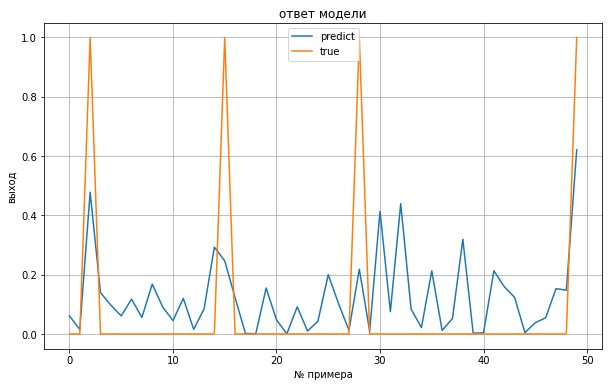

In [51]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [52]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')
fscore_median = fscore[ix]
precision_median = precision[ix]
recall_median = recall[ix]

Best Threshold=0.2603333751941717, F-Score=0.730, Precision=0.696, Recall=0.767


In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1673   82]
 [  58  187]]


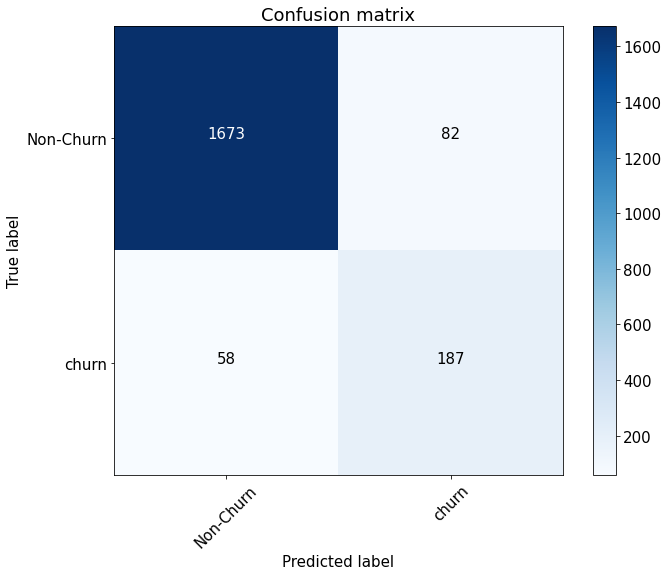

In [54]:
import itertools
# мы уже нашли ранее "оптимальный" порог, когда максимизировали f_score
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, preds > thresholds[ix])

plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-Churn', 'churn'],
                      title='Confusion matrix')
plt.savefig("data/conf_matrix.png")
plt.show()

In [55]:
roc_auc_median = roc_auc_score(y_test, preds)
roc_auc_median

0.9583906041048899

## Домашнее задание

1. *Самостоятельно повторить tfidf (документация https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
2. Модифицировать код функции get_user_embedding таким образом, чтобы считалось не среднее (как в примере np.mean), а медиана. Применить такое преобразование к данным, обучить модель прогнозирования оттока и посчитать метрики качества и сохранить их: roc auc, precision/recall/f_score (для 3 последних - подобрать оптимальный порог)
3. Повторить п.2, но используя уже не медиану, а max
4. *Воспользовавшись полученными знаниями из п.1, повторить пункт 2, но уже взвешивая новости по tfidf (взяв список новостей пользователя)
    - подсказка 1: нужно получить веса-коэффициенты для каждого документа. Не все документы одинаково информативны и несут какой-то положительный сигнал
    - подсказка 2: нужен именно idf, как вес.
5. Сформировать на выходе единую таблицу, сравнивающую качество 2/3 разных метода получения эмбедингов пользователей: median, max, idf_mean по метрикам roc_auc, precision, recall, f_score
6. Сделать самостоятельные выводы и предположения о том, почему тот или ной способ оказался эффективнее остальных

## Дополнительные ссылки

1. http://www.machinelearning.ru/wiki/images/d/d5/Voron17survey-artm.pdf
2. https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
3. http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/

Пункт 2 выполнил отредактировав функцию<br>
Для пункта 3 нужно повторить эмбединг заново


In [56]:
def get_user_embedding_max(user_articles_list, doc_dict):
    user_articles_list = eval(user_articles_list)
    user_vector = np.array([doc_dict[doc_id] for doc_id in user_articles_list])
    # print(user_vector)
    user_vector = np.max(user_vector, 0)  # можно не среднее
    return user_vector

In [57]:
user_articles_list = users['articles'].iloc[33]

get_user_embedding_max(user_articles_list, doc_dict)

array([0.        , 0.12264275, 0.17322733, 0.48183879, 0.        ,
       0.06019766, 0.56429487, 0.02284791, 0.40070069, 0.21426627,
       0.0258855 , 0.        , 0.17609793, 0.        , 0.03038137,
       0.        , 0.        , 0.31238762, 0.        , 0.06483214])

Теперь получим эмбединги для всех пользователей и проверим их качество на конкретной downstream-задаче

In [58]:
%%time
user_embeddings = pd.DataFrame([i for i in users['articles'].apply(lambda x: get_user_embedding_max(x, doc_dict))])
user_embeddings.columns = [f'topic_{i}' for i in range(N_topic)]
user_embeddings['uid'] = users['uid'].values
user_embeddings = user_embeddings[['uid']+[f'topic_{i}' for i in range(N_topic)]]
user_embeddings.head(3)

CPU times: total: 312 ms
Wall time: 310 ms


,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.120463,0.13001,0.055068,0.432138,0.0,0.351012,0.688264,0.048481,0.290618,...,0.053415,0.033474,0.023088,0.000000,0.045509,0.000000,0.234677,0.370073,0.023705,0.106314
1,u108690,0.041703,0.22415,0.014325,0.160948,0.0,0.082996,0.633385,0.066662,0.390586,...,0.092537,0.000000,0.110942,0.011801,0.000000,0.000000,0.108820,0.371797,0.024920,0.029074
2,u108339,0.010640,0.18829,0.042250,0.129610,0.0,0.173287,0.352074,0.048826,0.477984,...,0.058094,0.000000,0.030110,0.000000,0.000000,0.025239,0.139641,0.139608,0.042210,0.029583


In [59]:
user_embeddings.head()

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,u105138,0.120463,0.130010,0.055068,0.432138,0.000000,0.351012,0.688264,0.048481,0.290618,...,0.053415,0.033474,0.023088,0.000000,0.045509,0.000000,0.234677,0.370073,0.023705,0.106314
1,u108690,0.041703,0.224150,0.014325,0.160948,0.000000,0.082996,0.633385,0.066662,0.390586,...,0.092537,0.000000,0.110942,0.011801,0.000000,0.000000,0.108820,0.371797,0.024920,0.029074
2,u108339,0.010640,0.188290,0.042250,0.129610,0.000000,0.173287,0.352074,0.048826,0.477984,...,0.058094,0.000000,0.030110,0.000000,0.000000,0.025239,0.139641,0.139608,0.042210,0.029583
3,u101138,0.474052,0.000000,0.841727,0.136312,0.019857,0.066216,0.210642,0.052203,0.033559,...,0.394163,0.023988,0.082218,0.000000,0.011782,0.000000,0.010023,0.543315,0.049820,0.000000
4,u108248,0.031832,0.142669,0.089695,0.105624,0.000000,0.222938,0.386896,0.121873,0.332699,...,0.297882,0.000000,0.125044,0.069622,0.000000,0.000000,0.125351,0.357552,0.044340,0.022290


Датасет готов - можно попробовать обучить модель. Загрузим нашу разметку

In [60]:
target = pd.read_csv("data/users_churn.csv")
target.head(3)

,uid,churn
0,u107120,0
1,u102277,0
2,u102444,0


In [61]:
X = pd.merge(user_embeddings, target, 'left')
X.head(3)

,uid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,...,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,churn
0,u105138,0.120463,0.13001,0.055068,0.432138,0.0,0.351012,0.688264,0.048481,0.290618,...,0.033474,0.023088,0.000000,0.045509,0.000000,0.234677,0.370073,0.023705,0.106314,0
1,u108690,0.041703,0.22415,0.014325,0.160948,0.0,0.082996,0.633385,0.066662,0.390586,...,0.000000,0.110942,0.011801,0.000000,0.000000,0.108820,0.371797,0.024920,0.029074,1
2,u108339,0.010640,0.18829,0.042250,0.129610,0.0,0.173287,0.352074,0.048826,0.477984,...,0.000000,0.030110,0.000000,0.000000,0.025239,0.139641,0.139608,0.042210,0.029583,1


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [63]:
# разделим данные на train/test
X_train, X_test, y_train, y_test = train_test_split(X[[f'topic_{i}' for i in range(N_topic)]],
                                                    X['churn'], random_state=0)

In [64]:
logreg = LogisticRegression()
# обучим
logreg.fit(X_train, y_train)

LogisticRegression()

In [65]:
# наши прогнозы для тестовой выборки
preds = logreg.predict_proba(X_test)[:, 1]
preds[:10]

array([0.1289961 , 0.01186733, 0.54564398, 0.21896064, 0.04756338,
       0.02726551, 0.01484489, 0.00665757, 0.03353518, 0.04449222])

### Рассчитаем Precision, Recall, F_score

In [66]:
from sklearn.metrics import (f1_score, roc_auc_score, precision_score,
                             classification_report, precision_recall_curve, confusion_matrix)

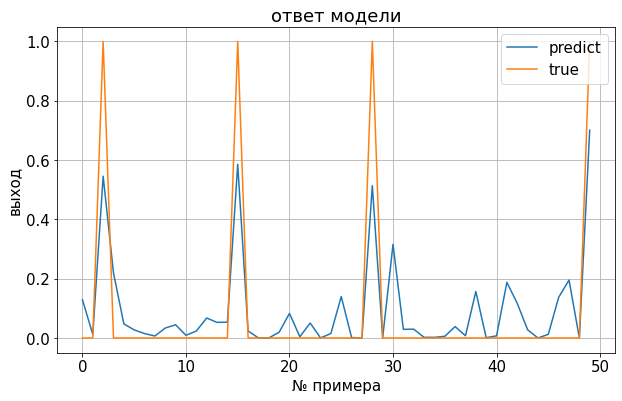

In [67]:
n = 50
plt.figure(figsize=(10, 6))
plt.plot(preds[:n], label='predict')
plt.plot(y_test.values[:n], label='true')
plt.title('ответ модели')
plt.xlabel('№ примера')
plt.ylabel('выход')
plt.legend()
plt.grid('On')
plt.show()

In [68]:
precision, recall, thresholds = precision_recall_curve(y_test, preds)
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]:.3f}, Precision={precision[ix]:.3f}, Recall={recall[ix]:.3f}')
fscore_max = fscore[ix]
precision_max = precision[ix]
recall_max = recall[ix]
roc_auc_max = roc_auc_score(y_test, preds)

Best Threshold=0.3248809995193143, F-Score=0.773, Precision=0.755, Recall=0.792


In [70]:
metric_df = pd.DataFrame({'median': [precision_median, recall_median, fscore_median, roc_auc_median], 'max': [precision_max, recall_max, fscore_max, roc_auc_max]}, index=['precision', 'recall', 'f1', 'roc_auc'])
metric_df

,median,max
precision,0.696296,0.754864
recall,0.767347,0.791837
f1,0.730097,0.772908
roc_auc,0.958391,0.968666


Из медианы и макисмального. Эмбеддинг по максимальному значению выигрывает
